# K1 ミカエリス-メンテンモデル

3.2節参照．

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


KM =  5.1


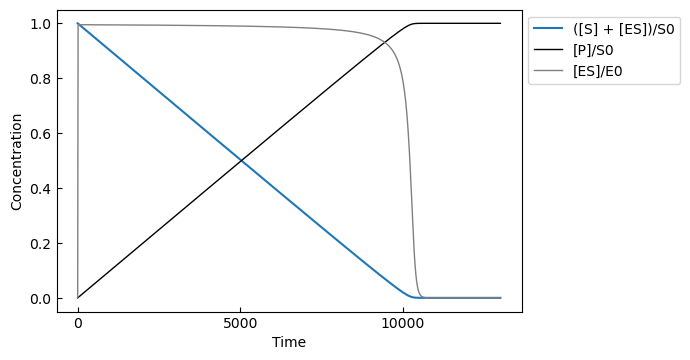

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def mm(var, t, kon, koff, k):  # ミカエリス-メンテンモデル
    S, ES, P = var
    E = E0 - ES
    dSdt = -kon*E*S + koff*ES
    dESdt = kon*E*S - koff*ES - k*ES
    dPdt =  k*ES

    return [dSdt, dESdt, dPdt]

kon, koff, k = 1, 5, 0.1  # 書籍では kon, koffは k+, k- に対応します．
S0, E0 =1000, 1  # 全濃度

t = np.linspace(0, 13000, 1000)
init = [S0, 0, 0] # 初期値
r = odeint(mm, init, t, args = (kon, koff, k)) # 微分方程式を解く

print("KM = ", (koff + k)/kon)  # ミカエリス定数

plt.figure(figsize = (6,4), dpi = 100)

plt.plot(t, (r[:,0]+r[:,1]) / S0, label = '([S] + [ES])/S0')
plt.plot(t, r[:,2] / S0, label = '[P]/S0', linewidth = 1, color = 'black')
plt.plot(t, r[:,1] / E0, label = '[ES]/E0', linewidth = 1, color = 'gray')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks([0,5000,10000])

plt.ylabel('Concentration')
plt.xlabel('Time')

plt.show()

# K2 アロステリック効果（ヘモグロビン，ポーリングモデル）

ポーリングモデル．横軸は酸素分圧．

3.6節参照．

n(fit) =  1.0 , kd(fit) =  0.3678794411714423
n(fit) =  1.9500137032893272 , kd(fit) =  0.081880980705429
n(fit) =  3.193393743260293 , kd(fit) =  0.01831563741960137


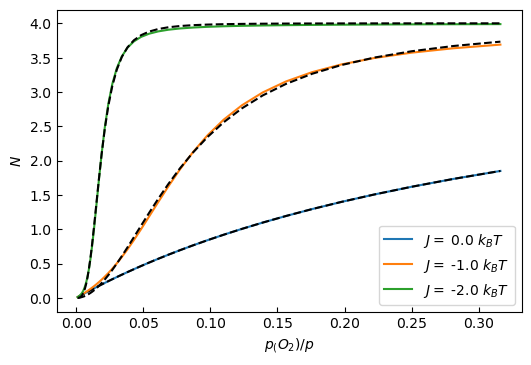

<Figure size 432x288 with 0 Axes>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(epsilon, mu, J):    # ポーリングモデル
    X = np.exp(-epsilon + mu)
    Y = np.exp(-J)
    
    Z = 1 + 4*X + 6*X*X*Y + 4*X*X*X*Y*Y*Y + X*X*X*X*Y*Y*Y*Y*Y*Y
    N = (4*X + 12*X*X*Y + 12*X*X*X*Y*Y*Y + 4*X*X*X*X*Y*Y*Y*Y*Y*Y)/Z
    
    return N

def hill(x, n, kd):    # ヒル関数（フィッティング用）
    return 4/(1+np.power(kd, n)/np.power(x, n))

epsilon = -1

p = np.logspace(-3, -0.5, base = 10)  # 酸素分圧
mu = np.log(p)

plt.figure(figsize=(6, 4) ,dpi = 100)

for J in [0, -1, -2]:
    N = f(epsilon, mu, J)
    (n_fit, kd_fit), cov = curve_fit(hill, p, N, p0 = [2, 0.01]) # ヒルの式によるフィット
    fit = hill(p, n_fit, kd_fit)
    
    plt.plot(p, N, label = r"$J =$ {:.1f} $k_BT$".format(J))
    plt.plot(p, fit, color = 'black', linestyle = 'dashed')
    print('n(fit) = ', n_fit, ', kd(fit) = ', kd_fit)
    
plt.ylabel(r'$N$')
plt.xlabel(r'$p_(O_2) / p$')
plt.legend()

plt.show()